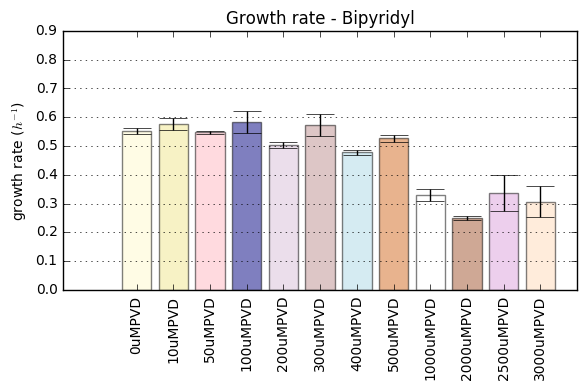

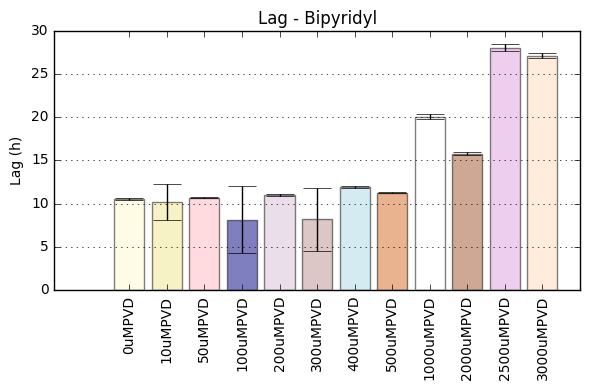

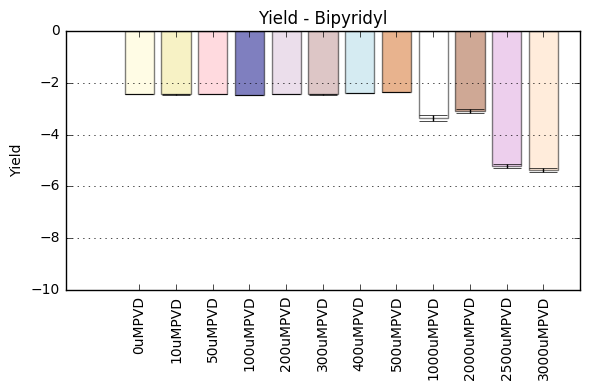

In [19]:
import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isfile, join, isdir
import matplotlib.pyplot as plt
import matplotlib
import scipy.optimize
import scipy.interpolate as si
from pandas import DataFrame as pddf
from pandas import Series as pds
import bisect
import csv
import glob

import os
import sys
module_path = os.path.abspath(os.path.join('/Users/maxime/Programme/fitderivpackage1.02/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from fitderiv import fitderiv 

def barPlot(labelList,y,stdy,ymin,ymax,title,ylabel,path,c):
    # Build the plot
    fig, ax = plt.subplots()
    x_pos = np.arange(len(labelList))
    ax.bar(x_pos, y, yerr=stdy, align='center', alpha=0.5, ecolor='black', capsize=10, color=c)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x_pos)
    plt.xticks(rotation=90)
    ax.set_xticklabels(labelList)
    ax.set_ylim([ymin,ymax])
    ax.set_title(title)
    ax.yaxis.grid(True)

    # Save the figure and show
    plt.tight_layout()
    plt.savefig(path)
    plt.show()
    
def findIdx(your_list,item):

    lst=pddf(your_list)
    lst2=lst[0].values
    lst3=lst2.tolist()
    return lst3.index(item)

def getOrderLabel(orderList,toOrganize):
    for idx in toOrganize:
        order.append(orderList.index(idx))
    return order

def organizeLabel(order,toOrganize):
    zipped=zip(toOrganize,order)
    organized=sorted(zipped, key=lambda x: x[1])
    l=zip(*organized)
    return list(l)[0]

#rootPath='/Users/maxime/Documents/experiences/milli/experienceDilutionWTstock2/'
#rootPath='/Users/maxime/Documents/experiences/milli/expIncub_4h30-6h30-24h-52h/'
#rootPath='/Users/maxime/Documents/experiences/milli/expDilution_5_50_500_3500/'
#rootPath='/Users/maxime/Documents/experiences/milli/expIncubation_14h-19h-43h/'
#rootPath='/Users/maxime/Documents/experiences/milli/experienceGreenRed/'
rootPath='/Users/maxime/Documents/experiences/milli/expBipyCAA/'
folder=[join(join(rootPath,o),'analysis/') for o in listdir(rootPath) if o[:3]=='201']




j=0
hexColor=[]
for name, hexC in matplotlib.colors.cnames.items():
    hexColor.append(hexC)
    j=j+1
    
nbColor=12
span=0
channel='PVD'

#orderList=['300uMGFP','500uMGFP','700uMGFP','900uMGFP','1100uMGFP','1300uMGFP','1500uMGFP','1700uMGFP','1900uMGFP','2100uMGFP','2300uMGFP','2500uMGFP']
#orderList=['300uMPVD','500uMPVD','700uMPVD','900uMPVD','1100uMPVD','1300uMPVD','1500uMPVD','1700uMPVD','1900uMPVD','2100uMPVD','2300uMPVD','2500uMPVD']
    
#orderList=['0uMGFP','10uMGFP','50uMGFP','100uMGFP','200uMGFP','300uMGFP','400uMGFP','500uMGFP','1000uMGFP','2000uMGFP','2500uMGFP','3000uMGFP']
orderList=['0uMPVD','10uMPVD','50uMPVD','100uMPVD','200uMPVD','300uMPVD','400uMPVD','500uMPVD','1000uMPVD','2000uMPVD','2500uMPVD','3000uMPVD']


for path in [folder[0]]:
    #print(path)    
    #path='/Users/maxime/Documents/experiences/milli/expDilution_5_50_500_3500/2018-02-09_dilution_CAA_WT-stock2/analysis/'
    gRateList=[]
    stdgRateList=[]
    lagList=[]
    stdlagList=[]
    yieldList=[]
    stdyieldList=[]
    labelList=[]
    
    fileList=glob.glob(path+'*'+channel+'resultInterp.csv')

    #print(sorted(fileList))
    
    for file in fileList:
        with open(file, 'r') as f:
            reader = csv.reader(f)
            your_list = list(reader)
        
        name=os.path.split(file)
        #print(your_list)

        
        stdgRateList.append(float(your_list[findIdx(your_list,'max df std')][1]))
        gRateList.append(float(your_list[findIdx(your_list,'max df')][1]))
        lagList.append(float(your_list[findIdx(your_list,'lag time')][1]))
        stdlagList.append(float(your_list[findIdx(your_list,'lag time std')][1]))
        yieldList.append(float(your_list[findIdx(your_list,'max y')][1]))
        stdyieldList.append(float(your_list[findIdx(your_list,'max y std')][1]))
        labelList.append(name[1][:-16])

    order=[]
    order=getOrderLabel(orderList,labelList)
    labelList=organizeLabel(order,labelList)
    stdgRateList=organizeLabel(order,stdgRateList)
    gRateList=organizeLabel(order,gRateList)
    lagList=organizeLabel(order,lagList)
    stdlagList=organizeLabel(order,stdlagList)
    yieldList=organizeLabel(order,yieldList)
    stdyieldList=organizeLabel(order,stdyieldList)


    barPlot(labelList,gRateList,stdgRateList,0,.9,'Growth rate - Bipyridyl','growth rate ($ h^{-1}$)',path+'gRateInterp'+channel+'.png',hexColor[span:span+nbColor])
    barPlot(labelList,lagList,stdlagList,0,30,'Lag - Bipyridyl','Lag (h)',path+'lagInterp'+channel+'.png',hexColor[span:span+nbColor])
    barPlot(labelList,yieldList,stdyieldList,-10,-0,'Yield - Bipyridyl','Yield',path+'yieldInterp'+channel+'.png',hexColor[span:span+nbColor])





In [61]:
fileList=glob.glob(path+'*'+channel+'resultInterp.csv')
print(fileList)

['/Users/maxime/Documents/experiences/milli/expBipyCAA/2018-06-20_CAA-bipy/analysis/0uMGFPresultInterp.csv', '/Users/maxime/Documents/experiences/milli/expBipyCAA/2018-06-20_CAA-bipy/analysis/10uMGFPresultInterp.csv']
